In [1]:
%cd /notebooks/anomaly-detector

/notebooks/anomaly-detector


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from src.utils import utils
    from src.utils import params
    from src.utils import thresholds as th
    from src.models import usad
    from src.models import usad_utils
    from src.data import columns
    from src.data import preprocessing
    from src.visualization import plotter
    
    from src.multivariate_ad import Multivariate_ad
    from src.univariate_ad import Univariate_ad
    
except ModuleNotFoundError:
    print("installing requirements..")
    os.system('pip install -r requirements.txt')
    from src.utils import utils
    from src.utils import params
    from src.utils import thresholds as th
    from src.models import usad
    from src.models import usad_utils
    from src.data import columns
    from src.data import preprocessing
    from src.visualization import plotter
    
    from src.multivariate_ad import Multivariate_ad
    from src.univariate_ad import Univariate_ad

In [3]:
df_path1 = '/notebooks/anomaly-detector/data/raw/V_GV_SYSMETRIC_INCTANCE_1.csv'
df_path2 = '/notebooks/anomaly-detector/data/raw/V_GV_SYSMETRIC_INCTANCE_2.csv'
df1 = preprocessing.get_df(df_path1, columns_name=None)
df2 = preprocessing.get_df(df_path2, columns_name=None)

dataframe shape: (36875, 153)
dataframe shape: (78503, 155)


In [4]:
db_time1 = df1['Database Time Per Sec']
db_time2 = df2['Database Time Per Sec']

In [7]:
db_time2

BEGIN_TIME
2022-01-18 23:58:26    387.990631
2022-01-18 23:59:27    768.712205
2022-01-19 00:00:26    961.549249
2022-01-19 00:01:27    545.783904
2022-01-19 00:02:26    571.484649
                          ...    
2022-03-14 23:54:26    700.066392
2022-03-14 23:55:27    751.652002
2022-03-14 23:56:26    705.228842
2022-03-14 23:57:26    751.572578
2022-03-14 23:58:26    585.550326
Name: Database Time Per Sec, Length: 78503, dtype: float64

In [15]:
print(len(db_time2.loc[:'2022-02-13']), len(db_time2.loc[:'2022-03-06']))
print(len(db_time2.loc[:'2022-02-06']), len(db_time2.loc[:'2022-02-13']))
print(len(db_time2.loc[:'2022-01-30']), len(db_time2.loc[:'2022-02-07']))

36945 67047
27004 36945
17146 28444


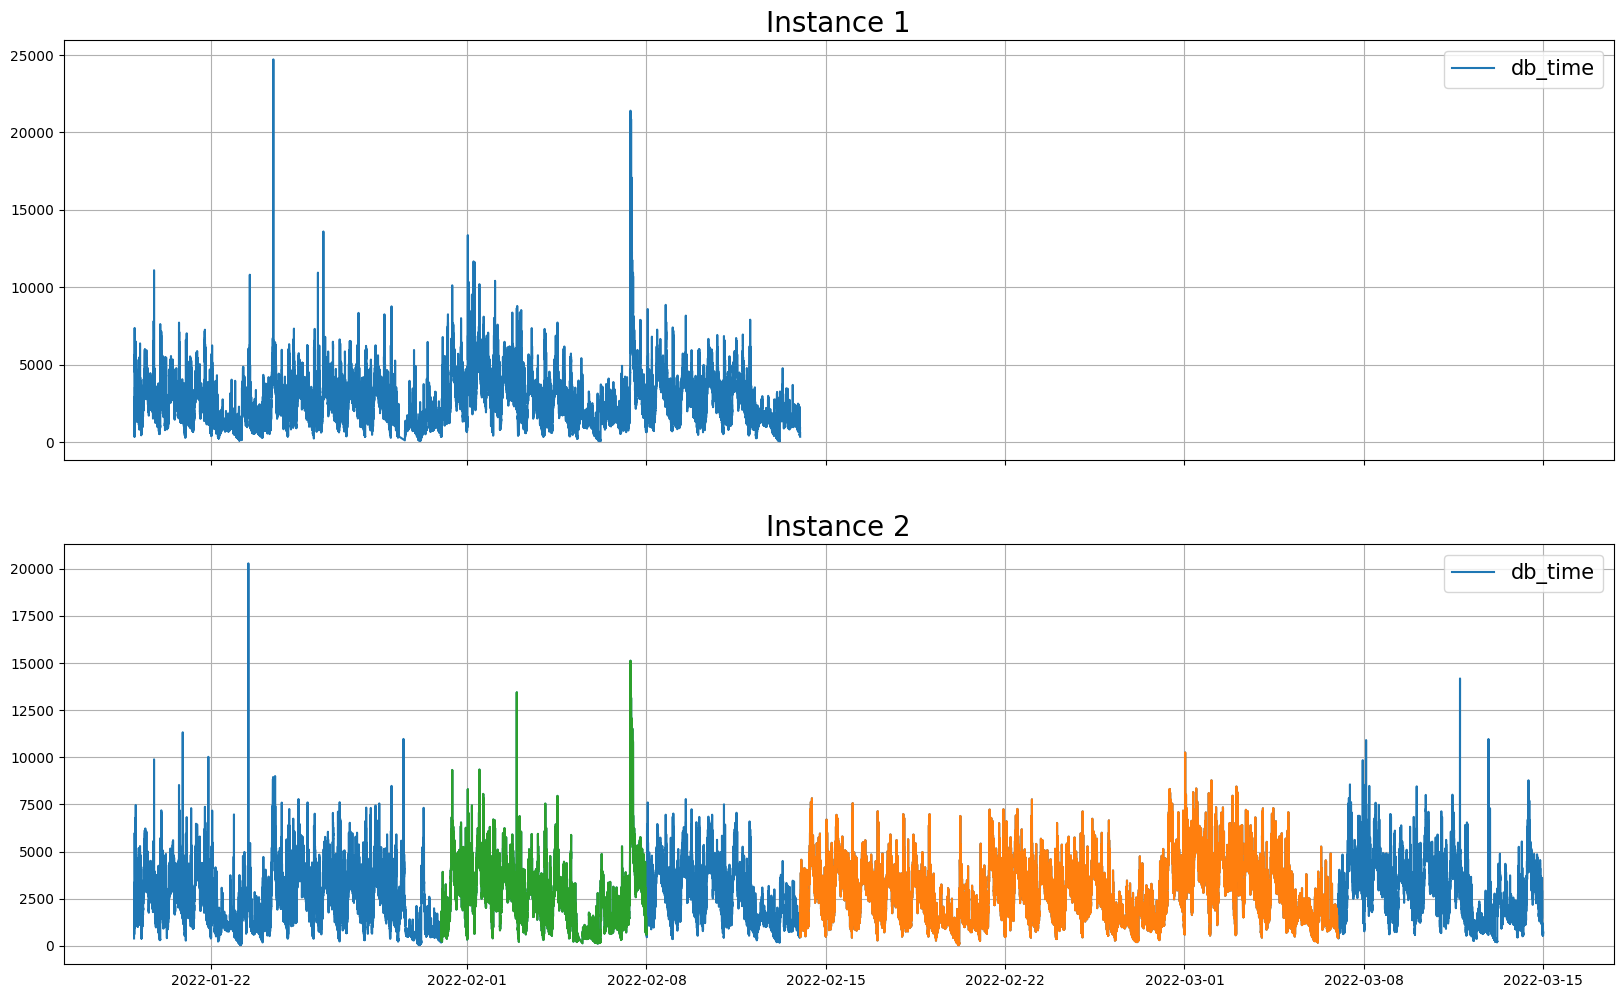

In [16]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(20,12))
ax[0].plot(db_time1, label='db_time')
ax[1].plot(db_time2, label='db_time')
ax[1].plot(db_time2.loc['2022-02-14':'2022-03-06'])
# ax[1].plot(db_time2[40320:70560])
ax[1].plot(db_time2[17146:28444])

ax[0].grid()
ax[0].legend(fontsize=15)
ax[0].set_title('Instance 1', fontsize=20)
ax[1].grid()
ax[1].legend(fontsize=15)
ax[1].set_title('Instance 2', fontsize=20)
fig.show()

In [7]:
PREPROCESSING_PARAMS, TRAINING_PARAMS, INTERVALS_PARAMS, TH_ALGORITHM, PLOT_PARAMS, PATH_PARAMS = params.get_params_jupyter(MULTI=True)

PREPROCESSING_PARAMS: {'downsamplig_rate': 5, 'window_size': 12, 'normalization': 'min-max', 'metrics': 'columns_6', 'single_file': True}
TRAINING_PARAMS: {'batch_size': 32, 'epochs': 100, 'hidden_size': 10, 'alpha': 0.5, 'beta': 0.5}
INTERVALS_PARAMS: {'train_start': 36945, 'train_end': 67047, 'test_start': 27004, 'test_end': 36945}
TH_ALGORITHM: iqr
PATH_PARAMS: {'DF_PATH': '/notebooks/anomaly-detector/data/raw/V_GV_SYSMETRIC_INCTANCE_2.csv', 'DF_TRAIN_PATH': '/notebooks/anomaly-detector/data/processed/filtered/clean_df.csv', 'DF_TEST_PATH': '/notebooks/anomaly-detector/data/processed/filtered/dirty_df.csv'}
PLOT_PARAMS: {'history_static': True, 'history_html': False, 'db_time_static': True, 'db_time_html': False, 'labels_static': True, 'labels_html': False, 'thresholds_static': True, 'thresholds_html': True}


In [8]:
m = Multivariate_ad(
            PREPROCESSING_PARAMS, TRAINING_PARAMS, INTERVALS_PARAMS, 
            TH_ALGORITHM, PLOT_PARAMS, PATH_PARAMS
    )

In [9]:
m.fit_predict()

dataframe shape: (78503, 19)
normalizing data using MinMax Scaler
normalizing data using MinMax Scaler
dataframe shape: (78503, 19)
Epoch [0], val_loss1: 0.0308, val_loss2: 0.0314
Epoch [1], val_loss1: 0.0240, val_loss2: 0.0004
Epoch [2], val_loss1: 0.0212, val_loss2: -0.0078
Epoch [3], val_loss1: 0.0197, val_loss2: -0.0107
Epoch [4], val_loss1: 0.0206, val_loss2: -0.0140
Epoch [5], val_loss1: 0.0212, val_loss2: -0.0163
Epoch [6], val_loss1: 0.0245, val_loss2: -0.0211
Epoch [7], val_loss1: 0.0252, val_loss2: -0.0226
Epoch [8], val_loss1: 0.0249, val_loss2: -0.0228
Epoch [9], val_loss1: 0.0256, val_loss2: -0.0237
Epoch [10], val_loss1: 0.0220, val_loss2: -0.0189
Epoch [11], val_loss1: 0.0164, val_loss2: -0.0143
Epoch [12], val_loss1: 0.0168, val_loss2: -0.0149
Epoch [13], val_loss1: 0.0169, val_loss2: -0.0151
Epoch [14], val_loss1: 0.0171, val_loss2: -0.0154
Epoch [15], val_loss1: 0.0178, val_loss2: -0.0162
Epoch [16], val_loss1: 0.0181, val_loss2: -0.0166
Epoch [17], val_loss1: 0.0180,